# Preparation des données
### Initialisation du projet



In [1]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Importation des données (csv)

In [2]:
import os
import pandas as pd

DATASETS_PATH = os.path.join("..\datasets")

def load_datasets_data(dataset_path=DATASETS_PATH):
	csv_general = pd.read_csv(os.path.join(dataset_path, "general_data.csv"))
	csv_manager = pd.read_csv(os.path.join(dataset_path, "manager_survey_data.csv"))
	csv_employee = pd.read_csv(os.path.join(dataset_path, "employee_survey_data.csv"))
	csv_intime = pd.read_csv(os.path.join(dataset_path, "in_time.csv"))
	csv_outtime = pd.read_csv(os.path.join(dataset_path, "out_time.csv"))
	return csv_general, csv_manager, csv_employee, csv_intime, csv_outtime

In [3]:
general_set, manager_set, employee_set, intime_set, outtime_set = load_datasets_data()

### Fusion des donnée indexé sur EmployeeID

In [4]:
dataset_merge = general_set.merge(employee_set.merge(manager_set, on="EmployeeID"), on="EmployeeID")
dataset = dataset_merge.copy()

### Traitement des informations d'entrée et de sortie

In [5]:
intime_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [6]:
outtime_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [7]:
intime_set = intime_set.replace(np.nan, 0)

In [8]:
intime_set.iloc[:, 1:] = intime_set.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
intime_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


In [9]:
outtime_set = outtime_set.replace(np.nan, 0)
outtime_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [10]:
outtime_set.iloc[:, 1:] = outtime_set.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


Fusion de outime et de intime

In [11]:
intime_set = intime_set.append(outtime_set)
intime_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8820 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 17.7 MB


In [12]:
intime_set = intime_set.diff(periods=4410)
intime_set = intime_set.iloc[4410:]
intime_set.reset_index(inplace=True)

C:\Users\cruel\AppData\Local\Temp/ipykernel_11676/687009886.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  intime_set.reset_index(inplace=True)


In [13]:
intime_set.drop(columns=['index', 'Unnamed: 0'],axis=1, inplace=True)

In [14]:
intime_set.shape

(4410, 261)

In [15]:
intime_set.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
             ], axis = 1,inplace=True)

In [16]:
intime_set.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [17]:
intime_set['Actual Time']=intime_set.mean(axis=1)

In [18]:
intime_set['Actual Time'].head()

0   0 days 06:52:12.823293172
1   0 days 07:18:57.493975903
2   0 days 06:48:57.891566265
3   0 days 06:47:21.172690763
4   0 days 07:52:39.220883534
Name: Actual Time, dtype: timedelta64[ns]

In [19]:
intime_set['hrs']=intime_set['Actual Time']/np.timedelta64(1,'h')


In [20]:
intime_set.reset_index(inplace=True)
intime_set.head()

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Actual Time,hrs
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49,0 days 06:52:12.823293172,6.870229
1,1,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38,0 days 07:18:57.493975903,7.315971
2,2,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11,0 days 06:48:57.891566265,6.816081
3,3,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59,0 days 06:47:21.172690763,6.789215
4,4,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05,0 days 07:52:39.220883534,7.877561


In [21]:
intime_set.drop(intime_set.columns.difference(['index','hrs']), 1, inplace=True)

C:\Users\cruel\AppData\Local\Temp/ipykernel_11676/280449017.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  intime_set.drop(intime_set.columns.difference(['index','hrs']), 1, inplace=True)


In [22]:
intime_set.rename(columns={'index': 'EmployeeID'}, inplace=True)
intime_set.head()

,EmployeeID,hrs
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561


In [23]:
dataset = dataset.merge(intime_set, on="EmployeeID")

### Nettoyage des données / Complétion

In [24]:
#https://prod.liveshare.vsengsaas.visualstudio.com/join?6712A4B62ABC55A3AC374AFD25A834927C4D

incomplete_attributes = ["NumCompaniesWorked","JobSatisfaction","EnvironmentSatisfaction","WorkLifeBalance", "TotalWorkingYears"]

for attribute in incomplete_attributes:
	median = dataset[attribute].median()
	dataset[attribute].fillna(median, inplace=True) # option 3

#Autre methode
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [25]:
rawArray = ["Age","DistanceFromHome","Education","TotalWorkingYears",
	"TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager",
	"EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","JobInvolvement", "NumCompaniesWorked", "hrs"]

dataset_yes = dataset.where(dataset["Attrition"]=="Yes", 0)
dataset_no  = dataset.where(dataset["Attrition"]=="No", 1)

dataset_yes = dataset_yes.loc[dataset_yes["Attrition"] != 0]
dataset_no = dataset_no.loc[dataset_no["Attrition"] != 1]

print("Attrition NO: ", len(dataset_no) ," Attrition YES: ", len(dataset_yes))


# for col in rawArray:
#     plt.boxplot([dataset_yes[col].apply(np.int64), dataset_no[col].apply(np.int64)])
#     print(col)
#     plt.show()

# for col in rawArray:
# 	print(col)
# 	plt.hist(dataset_yes[col].apply(np.int64), color="red", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()
# 	plt.hist(dataset_no[col].apply(np.int64), color="green", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()

Attrition NO:  3698  Attrition YES:  711


#### Séparation des données et de la colonne attrition

In [26]:
# Data frame is created under column name Name and Attrition
data_frame = pd.DataFrame(dataset, columns=["Attrition"])

# Data of Attrition is converted into Binary Data
df_one = pd.get_dummies(data_frame["Attrition"])

# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)

# Attritioncolumn is dropped
df_two = df_two.drop(["Attrition"], axis=1)

# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)

# Rename the Column
result = df_two.rename(columns={"Yes": "Attrition"})

dataset_test = dataset.copy()
dataset_test["Attrition"] = result["Attrition"]

In [27]:
dataset_test.corr()["Attrition"]

Age                       -0.159177
Attrition                  1.000000
DistanceFromHome          -0.009505
Education                 -0.015103
EmployeeCount                   NaN
EmployeeID                -0.004559
JobLevel                  -0.010296
MonthlyIncome             -0.031199
NumCompaniesWorked         0.041963
PercentSalaryHike          0.032449
StandardHours                   NaN
StockOptionLevel          -0.006932
TotalWorkingYears         -0.170183
TrainingTimesLastYear     -0.049219
YearsAtCompany            -0.134247
YearsSinceLastPromotion   -0.032995
YearsWithCurrManager      -0.156100
EnvironmentSatisfaction   -0.101814
JobSatisfaction           -0.103047
WorkLifeBalance           -0.062944
JobInvolvement            -0.015416
PerformanceRating          0.023362
hrs                        0.000704
Name: Attrition, dtype: float64

In [28]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,hrs
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.0,...,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.692447,15.210252,8.0,...,2.798594,7.004990,2.187571,4.122023,2.725561,2.729417,2.763438,2.729644,3.153776,7.314463
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.493865,3.659203,0.0,...,1.288222,6.122203,3.222042,3.566975,1.089665,1.099021,0.703612,0.711223,0.360775,1.330903
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.416880
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.278995
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.011237
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.900932
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.937261


## Pipeline	

Séparation du dataset en deux partie : les valeurs numeriques et les chaines de caractères

In [29]:
Attrition = dataset.loc[:, "Attrition"]

In [30]:
dataset_pl = dataset.copy()

useless_value = ['Attrition','StandardHours','EmployeeCount','EmployeeID', "Over18", "Department"] 
dataset_pl = dataset_pl.drop(useless_value, axis=1)

ds_num = dataset_pl.select_dtypes(include=[np.number])
ds_num.drop('JobLevel', axis=1, inplace=True)

ds_str = dataset_pl.select_dtypes(exclude=[np.number])
ds_str["JobLevel"] = dataset_pl["JobLevel"] 

D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\cruel\AppData\Local\Temp/ipykernel_11676/4174448821.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_str["JobLevel"] = dataset_pl["JobLevel"]


Ici on utilisera le OneHotEncodeur pour transformer les features qualitatives en plusieur colonnes

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

encoder = OneHotEncoder()
encoder.fit(ds_str)
# dataset.head(10)

num_attribs = list(ds_num)
str_attribs = list(ds_str)

num_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy="median")), 
	('std_scaler', StandardScaler()),			   
])

full_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("str", encoder, str_attribs),
])

dataset_pipeline = full_pipeline.fit_transform(dataset_pl)
dataset_pipeline

array([[ 1.54129037, -0.39360769, -0.89156859, ...,  0.        ,
         0.        ,  0.        ],
       [-0.64852651,  0.10021498, -1.86819615, ...,  0.        ,
         0.        ,  0.        ],
       [-0.53903567,  0.96440465,  1.06168652, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8675082 , -0.88743036,  1.06168652, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30547158,  1.95204999, -0.89156859, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55587277,  1.08786032, -0.89156859, ...,  0.        ,
         0.        ,  0.        ]])

On utiliseras "dataset_prepared" pour tout nos futures opérations

In [32]:
dataset_prepared = pd.DataFrame(
    dataset_pipeline,
    columns=list(np.concatenate((num_attribs, encoder.get_feature_names(str_attribs)))))
dataset_prepared


,Age,DistanceFromHome,Education,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
0,1.541290,-0.393608,-0.891569,1.404934,-0.678721,-1.150723,-0.932212,-1.321970,2.485416,-0.980966,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.648527,0.100215,-1.868196,-0.491658,-1.079751,2.129051,0.241773,-0.678839,0.156362,-0.327532,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-0.539036,0.964405,1.061687,2.724709,-0.678721,-0.057465,2.589744,-0.807466,-0.619989,-0.327532,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.117909,-0.887430,2.038314,0.386209,0.123338,-1.150723,2.589744,0.221544,1.709065,0.162543,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.539036,0.100215,-1.868196,-0.884064,0.524367,-0.877408,1.415759,-0.292961,-0.619989,-0.164174,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,-0.867508,-0.640519,0.085059,-0.629754,-0.678721,0.762479,-0.932212,-0.678839,-0.619989,-0.164174,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4405,0.555873,-0.517063,1.061687,-0.100739,0.123338,0.489164,0.241773,-0.164335,1.709065,-0.654249,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4406,-0.867508,-0.887430,1.061687,-0.812466,-0.277692,-0.057465,-0.932212,-0.164335,-0.619989,-0.654249,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4407,-1.305472,1.952050,-0.891569,-0.595124,-1.079751,1.309108,-0.932212,-0.807466,0.932714,-0.490890,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Nettoyage de données

Ici on supprimera les données que l'on estime comme inutile
> - Attrition_No -> Car on se sert uniquement de Attrition_Yes
> - StandardHours -> Car sur leurs contract les employés ont tous les même horaires
> - EmployeeCount -> Est toujours égale à 1
> - EmployeeID -> N'est pas une données à prendre en considération
> - Over18_Y -> Tous les employés ont au dessus de 18 ans 

#### Isolation des valeurs d'attritions pour de futures traitements

In [33]:
y = pd.get_dummies(Attrition, drop_first=True)
x = dataset_prepared
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4409 non-null   float64
 1   DistanceFromHome                   4409 non-null   float64
 2   Education                          4409 non-null   float64
 3   MonthlyIncome                      4409 non-null   float64
 4   NumCompaniesWorked                 4409 non-null   float64
 5   PercentSalaryHike                  4409 non-null   float64
 6   StockOptionLevel                   4409 non-null   float64
 7   TotalWorkingYears                  4409 non-null   float64
 8   TrainingTimesLastYear              4409 non-null   float64
 9   YearsAtCompany                     4409 non-null   float64
 10  YearsSinceLastPromotion            4409 non-null   float64
 11  YearsWithCurrManager               4409 non-null   float

### Creation des sets d'entrainement et de test

In [34]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, stratify=y)

### Implémentation du model : SVC

In [35]:
#Import svm model
from sklearn import svm
from sklearn import metrics

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.8994708994708994


# Performance et validation
### Cross validation et accuracy score

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8994708994708994


In [37]:
from sklearn.model_selection import cross_val_predict
dt_pred = cross_val_predict(clf, X_train, y_train, cv=3)
dt_pred


D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [38]:
from sklearn.model_selection import cross_val_score
dt_score = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
dt_score

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.87852284, 0.88921283, 0.88229572])

#### Matrice de confusion

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1100,   10],
       [ 123,   90]], dtype=int64)

#### Score de précision

In [40]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.9


In [41]:
from sklearn.metrics import precision_score, recall_score
fpr = precision_score(y_test, y_pred)
fpr

0.9

#### Rapport de la classification

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1110
           1       0.90      0.42      0.58       213

    accuracy                           0.90      1323
   macro avg       0.90      0.71      0.76      1323
weighted avg       0.90      0.90      0.88      1323



#### Score de rappel

In [43]:
tpr = recall_score(y_test, y_pred)
tpr

0.4225352112676056

#### F1 Score

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5750798722044729

#### Creation de la courbre ROC

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


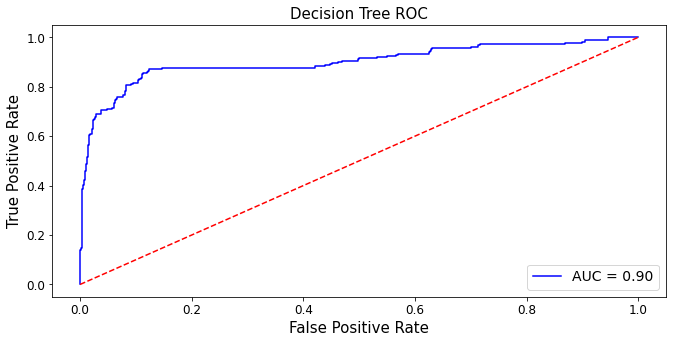

In [46]:
from sklearn import metrics

plt.figure(figsize=(11,5))

lrprob = clf.predict_proba(X_test)
lr_pred = lrprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Decision Tree ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

#### Coubre de la relation entre la précision et le rappel

In [47]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

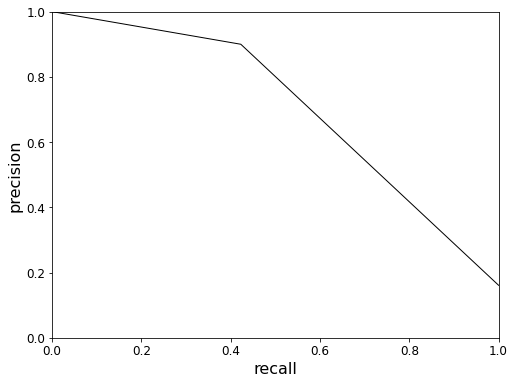

In [48]:

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=1)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()